## Exploratory Data Analysis Case Study - Pt. 2

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
pd.__version__

'1.2.0'

In [11]:
df = pd.read_csv('taxis_bikes_nycity.csv')

In [12]:
df.head()

,Data,Distancia,Tempo
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN


In [13]:
df.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

In [14]:
df = pd.read_csv('data/dataframe_saved_v1.csv', parse_dates = ['Date'])
cols = ['Date', 'Distance', 'Time']
df.colums = cols

<ipython-input-14-315294e494ef>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = cols


In [15]:
df.head()

,Date,Distance,Time
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [16]:
df.dtypes

Date        datetime64[ns]
Distance           float64
Time                object
dtype: object

In [17]:
cols = ['Date', 'Distance', 'Time']
df.columns = cols
df.head()

,Date,Distance,Time
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [18]:
df.set_index('Date', inplace = True)

In [19]:
df.head()

,Distance,Time
Date,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


<AxesSubplot:xlabel='Date'>

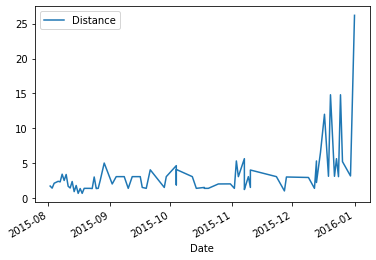

In [20]:
df.plot()

In [21]:
def total_seconds(time):
    if time is np.nan:
        return np.nan 
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds    

In [22]:
df['Seconds'] = df.Time.map(total_seconds)

In [23]:
df.head(10)

,Distance,Time,Seconds
Date,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [24]:
df.describe()

,Distance,Seconds
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


In [25]:
df.fillna(0).describe()

,Distance,Seconds
count,81.000000,81.000000
mean,3.137531,1220.901235
std,3.634519,2240.756985
min,0.650000,0.000000
25%,1.370000,0.000000
50%,2.100000,573.000000
75%,3.050000,1426.000000
max,26.200000,15643.000000


In [26]:
df['Minutes'] = df['Seconds'].map(lambda x: x / 60)

In [27]:
df.fillna(0).describe()

,Distance,Seconds,Minutes
count,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354
std,3.634519,2240.756985,37.345950
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,573.000000,9.550000
75%,3.050000,1426.000000,23.766667
max,26.200000,15643.000000,260.716667


<AxesSubplot:xlabel='Distance', ylabel='Minutes'>

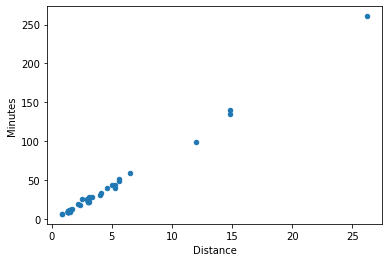

In [28]:
df.plot(x = 'Distance', y = 'Minutes', kind = 'scatter')

In [29]:
df.corr()

,Distance,Seconds,Minutes
Distance,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


In [30]:
df.corr(method = 'spearman')

,Distance,Seconds,Minutes
Distance,1.00000,0.96482,0.96482
Seconds,0.96482,1.00000,1.00000
Minutes,0.96482,1.00000,1.00000


In [31]:
df.corr(method = 'kendall')

,Distance,Seconds,Minutes
Distance,1.00000,0.88305,0.88305
Seconds,0.88305,1.00000,1.00000
Minutes,0.88305,1.00000,1.00000


<AxesSubplot:>

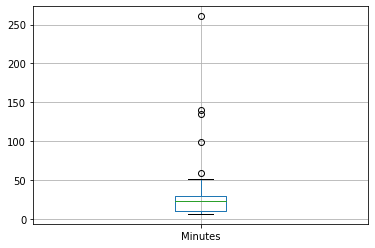

In [33]:
df.boxplot('Minutes', return_type = 'axes')

In [34]:
df['Min_Per_Km'] = df['Minutes'] / df['Distance']

In [35]:
df.fillna(0).describe()

,Distance,Seconds,Minutes,Min_Per_Km
count,81.000000,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354,4.959450
std,3.634519,2240.756985,37.345950,3.803856
min,0.650000,0.000000,0.000000,0.000000
25%,1.370000,0.000000,0.000000,0.000000
50%,2.100000,573.000000,9.550000,6.962963
75%,3.050000,1426.000000,23.766667,7.792350
max,26.200000,15643.000000,260.716667,10.000000


array([[<AxesSubplot:title={'center':'Min_Per_Km'}>]], dtype=object)

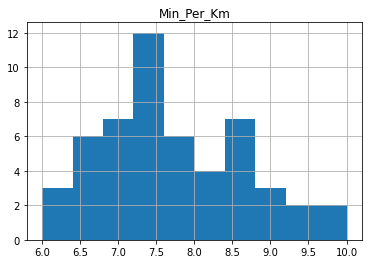

In [36]:
df.hist('Min_Per_Km')

array([[<AxesSubplot:title={'center':'Min_Per_Km'}>]], dtype=object)

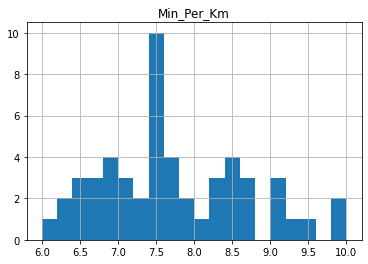

In [37]:
df.hist('Min_Per_Km', bins = 20)

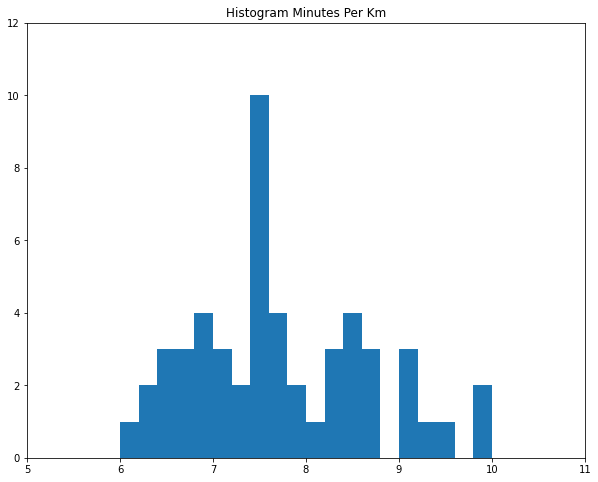

In [38]:
df.hist('Min_Per_Km', bins = 20, figsize = (10, 8))
plt.xlim((5, 11))
plt.ylim((0, 12))
plt.title("Histogram Minutes Per Km")
plt.grid(False)
plt.savefig('imagens/hist_minutes_per_km.png')

<AxesSubplot:xlabel='Date'>

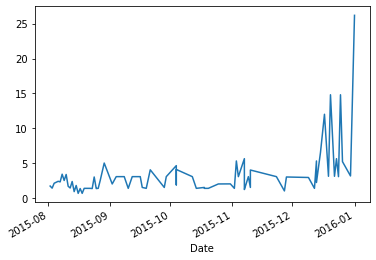

In [39]:
df['Distance'].plot()

In [40]:
df.head(15)

,Distance,Time,Seconds,Minutes,Min_Per_Km
Date,,,,,
2015-08-02,1.70,NaN,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865
2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291


<AxesSubplot:xlabel='Date'>

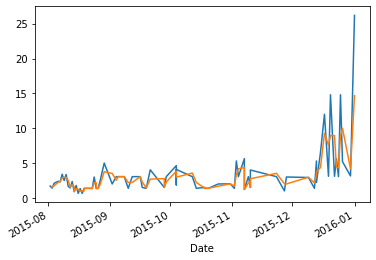

In [41]:
df['Distance'].plot()
pd.Series(df['Distance']).rolling(window = 2).mean().plot()

<AxesSubplot:xlabel='Date'>

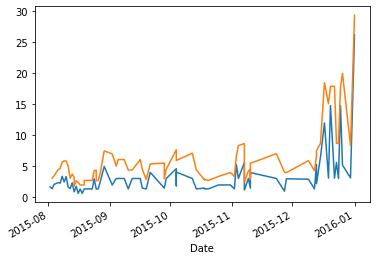

In [42]:
df['Distance'].plot()
pd.Series(df['Distance']).rolling(window = 2).sum().plot()

In [43]:
df.index

DatetimeIndex(['2015-08-02', '2015-08-03', '2015-08-04', '2015-08-06',
               '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17',
               '2015-08-18', '2015-08-19', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-25', '2015-08-26', '2015-08-27',
               '2015-08-29', '2015-09-02', '2015-09-04', '2015-09-05',
               '2015-09-08', '2015-09-10', '2015-09-12', '2015-09-16',
               '2015-09-17', '2015-09-19', '2015-09-21', '2015-09-28',
               '2015-09-28', '2015-09-29', '2015-10-04', '2015-10-04',
               '2015-10-04', '2015-10-12', '2015-10-14', '2015-10-18',
               '2015-10-18', '2015-10-18', '2015-10-20', '2015-10-25',
               '2015-10-31', '2015-11-02', '2015-11-03', '2015-11-04',
      

In [44]:
df['2015-11':'2015-12']

,Distance,Time,Seconds,Minutes,Min_Per_Km
Date,,,,,
2015-11-02,1.37,0:08:43,523.0,8.716667,6.362530
2015-11-03,5.30,0:39:26,2366.0,39.433333,7.440252
2015-11-04,3.05,0:22:12,1332.0,22.200000,7.278689
2015-11-07,5.63,0:49:05,2945.0,49.083333,8.718176
2015-11-07,1.26,NaN,NaN,NaN,NaN
2015-11-07,1.20,NaN,NaN,NaN,NaN
2015-11-09,3.05,0:22:36,1356.0,22.600000,7.409836
2015-11-10,1.50,0:09:00,540.0,9.000000,6.000000
2015-11-10,1.50,0:11:33,693.0,11.550000,7.700000


<AxesSubplot:xlabel='Date'>

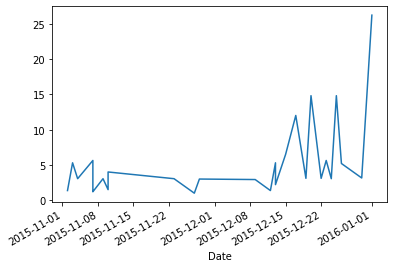

In [49]:
df['2015-11':'2016-1-1']['Distance'].plot()

In [50]:
df.loc['2015-8-12']

Distance        1.420000
Time             0:10:35
Seconds       635.000000
Minutes        10.583333
Min_Per_Km      7.453052
Name: 2015-08-12 00:00:00, dtype: object

In [51]:
df.to_csv('data/dataframe_saved_v2.csv')

In [52]:
df.reset_index()

,Date,Distance,Time,Seconds,Minutes,Min_Per_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459
78,2015-12-26,5.20,NaN,NaN,NaN,NaN
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037
